### basic utilities

In [1]:
from gymnasium import Env
from gymnasium.spaces import Discrete, Box
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from termcolor import colored

def status(level="info", msg="", parameter=None ):
    
    colors = {"info": "cyan",
              "warn": "yellow",
              "error": "red",
              "success": "green"}
    
    print(colored(f"\n[{level.upper()}]: {msg}\n", colors.get(level, "white")), parameter)

# 🧠 Random number helper (seedless by default)
def random_uniform(low=0.0, high=1.0):
    """
    Generate a random float uniformly between `low` and `high`.

    reproducibility:
    ---------------------------------
    - By default, this function uses NumPy's global random generator.
      That means each time you run the notebook, you'll get new random values.
    
    - If you ever want **reproducible results**, do this instead:
        rng = np.random.default_rng(42)       # 42 = your chosen seed
        return rng.uniform(low, high)
    """
    _random_uniform = np.random.uniform(low, high)
    status("success", "generated random uniform", _random_uniform)
    return _random_uniform

# 🎯 Random integer helper (seedless by default)
def random_uniform_int(low, high):
    """
    Generate a random integer between `low` (inclusive) and `high` (exclusive).

    reproducibility:
    ---------------------------------
    - By default, this function uses NumPy's global random generator.
      That means each time you run the notebook, you'll get new random integers.
    
    - For **reproducible results**, do this instead:
        rng = np.random.default_rng(42)       # 42 = your chosen seed
        return rng.integers(low, high)
    """
    _random_int = np.random.randint(low, high)
    status("success", "generated random integer", _random_int)
    return _random_int

def random_discrete(_low, _high, _step):
  
  _random_discrete = np.random.choice(np.arange(_low, _high, _step))
  status("success", "generated random discrete", _random_discrete)
  return _random_discrete



### Configurations

In [2]:
# numpy clean printing
np.set_printoptions(precision=3, suppress=True)

RISK_LEVELS = ["LOW", "BALANCED", "HIGH"]
INFLATION_RATES = [random_uniform(0.02, 0.04), random_uniform(0.04, 0.06), random_uniform(0.06, 0.08)]
ROI_RANGES=[(0.05, 0.10), (0.10, 0.20), (0.25, 0.50)]
MAX_PROJECTS = 10
MIN_PROJECTS = 5

def generate_initial_state_configs(project_type="Normal"):
    match project_type:
        case "Normal":
            return {
                "COST_PERFORMANCE": random_uniform(0.75, 1.0),
                "SCHEDULE_PERFORMANCE": random_uniform(0.75, 1.0)
            }
        case "Low":
            return {
                "COST_PERFORMANCE": random_uniform(0.5, 0.75),
                "SCHEDULE_PERFORMANCE": random_uniform(0.5, 0.75)
            }
        case "High":
            return {
                "COST_initial_state": random_uniform(1.0, 1.25),
                "SCHEDULE_PERFORMANCE": random_uniform(1.0, 1.25)
            }
        case _:
            raise ValueError(f"Unknown project type: {project_type}")


CONFIGURATIONS= {
    "TOTAL_BUDGET": 1,
    "TOTAL_TIMESTEPS": 12,
    
    # 15%–30%, 5% STEPS
    "ADVANCED_PAYMENT_RATIO": random_discrete(0.15, 0.31, 0.05),  
    
    # 10%–15%, 5% STEPS
    "FINAL_PAYMENT_RATIO": random_discrete(0.10, 0.16, 0.05),
    
    "MAX_PROJECTS" : MAX_PROJECTS,
    "MIN_PROJECTS" : MIN_PROJECTS,
    "n_projects": random_uniform_int(MIN_PROJECTS, MAX_PROJECTS),
}

INFLOW_COMPOSITIONS = {
    "LOW_RISK": {
        "milestone_based": 0.60,
        "ev_based":         0.25,
        "lump_sum":         0.15
    },
    "BALANCED": {
        "milestone_based": 0.50,
        "ev_based":         0.30,
        "lump_sum":         0.20
    },
    "HIGH_RISK": {
        "milestone_based": 0.40,
        "ev_based":         0.40,
        "lump_sum":         0.20
    }
}

LOW_RISK_SCENARIO_CONFIGS ={
    "RISK_LEVEL": RISK_LEVELS[0],
    "INFLATION_RATE": INFLATION_RATES[0],
    "ROI_RANGE": ROI_RANGES[0],
    "INFLOW_COMPOSITION": INFLOW_COMPOSITIONS["LOW_RISK"]
}

BALANCED_RISK_SCENARIO_CONFIGS ={
    "RISK_LEVEL": RISK_LEVELS[1],
    "INFLATION_RATE": INFLATION_RATES[1],
    "ROI_RANGE": ROI_RANGES[1],
    "INFLOW_COMPOSITION": INFLOW_COMPOSITIONS["BALANCED"]
}

HIGH_RISK_SCENARIO_CONFIGS ={
    "RISK_LEVEL": RISK_LEVELS[2],
    "INFLATION_RATE": INFLATION_RATES[2],
    "ROI_RANGE": ROI_RANGES[2],
    "INFLOW_COMPOSITION": INFLOW_COMPOSITIONS["HIGH_RISK"]
}



[SUCCESS]: generated random uniform
 0.03460355836665906

[SUCCESS]: generated random uniform
 0.045262493622792145

[SUCCESS]: generated random uniform
 0.0614814279711953

[SUCCESS]: generated random discrete
 0.25

[SUCCESS]: generated random discrete
 0.15000000000000002

[SUCCESS]: generated random integer
 5


### 🚀 Activating scenarios

*later to be set as a test design architecture*

In [3]:
# 🔧 Choose the active configuration
ACTIVE_SCENARIO = LOW_RISK_SCENARIO_CONFIGS
status("warn", "ACTIVE_SCENARIO", ACTIVE_SCENARIO)


[WARN]: ACTIVE_SCENARIO
 {'RISK_LEVEL': 'LOW', 'INFLATION_RATE': 0.03460355836665906, 'ROI_RANGE': (0.05, 0.1), 'INFLOW_COMPOSITION': {'milestone_based': 0.6, 'ev_based': 0.25, 'lump_sum': 0.15}}


### Importing the torch and checking Cuda availability

In [4]:
# import torch
# print(torch.__version__)
# print("CUDA available:", torch.cuda.is_available())
# print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU only")
# status("warn", "ACTIVE_SCENARIO", ACTIVE_SCENARIO)

# Introduction
This continues the paragraph normally.here we're going to elaborate on the problem definition and design choices.

## Overview on Project Portfolio Management
This continues the paragraph normally.here we're going to elaborate on the problem definition and design choices.

### Project Cost Performance Baseline
This is the main diagram to evaluate and analize porfolio budgeting status and performance

<img style="
padding-top: 2em;
padding-left: 2em; 
margin: auto;
display: block;
" src="../assets/public/Project-cost-baseline-graph.jpg" alt="drawing" width="400"/>

## Deffinition of the Problem and scope
This is an endevour to build and train a DRL agent that will learn to allocate budget for a portfolio of projects under cashflow uncertainties.

<div style="color: cyan;">**This is not an other Project portfolio simulation, This is a DRL Artificial Agent framework ready to adapt for project portfolio budgetting with configurable specifications to implement on any realworld portfolio**</div>

the focus and main objective is to train an agent with robust and stable policy for basic deterministic (0 uncertainty ) to the most uncertain environment for both cost performance and expected payment delays and shortage amounts.

just like a project with the goal to train an agent to walk, mere walking in a simple direction is not sufficient. we would expect the agent to have the capabilities to walk across uneven surfaces in multiple desired directions and pivot around the obstacles. after that we would strees test the policies and the agent's ability by pushing him or throwing objects at him to test it's ability to maintain the action of walking toward the target destination.

<img style="
padding-top: 2em;
padding-left: 2em; 
margin: auto;
display: block;
" src="../assets/public/walking_agent_recording_gif_5MB.gif" alt="drawing" width="600"/>

what we do here follows the same process.
we would train an agent on a base deterministic scenario so he would learn the basic budget allocation decisions and then start to make the envronment as uncertain as possible and meaningful and of course feasable for progressive allocation and positive ROI.

As the main idea is to introduce a generic solution for the problem and deliver a DRL framework for budgeting, the scenarios and composition of parameters would have a wide range of sensitivity test to encapsulate almost all realworld portfolios.


### limitations and future work
* integrated risk management models to simulate portfolio level risk corelations.</br>
        We do not exhaustively model all types of inter-project dependences (e.g., copulas or client-cluster Markov chains). Those are left for future work. Our choice balances experimental clarity and realism: the latent-factor + shock tests capture first-order correlated behaviors relevant to portfolio budgeting while keeping the study focused.

# environment design overview
The desing for the environment consists of several key components.
here's an infograph of environment and it's architecture:

<img style="
padding-top: 2em;
padding-left: 2em; 
margin: auto;
display: block;
" src="../assets/Info_graphs/environment/Mindmap - 2025.10.30-Environment.svg" alt="drawing" width="400"/>


## The ROI (Return On Investment) model
The model for ROI
* a good academic middle ground is 10–15% ROI on BAC at completion

    | Scenario                         | Typical ROI Margin | Interpretation                |
    | -------------------------------- | ------------------ | ----------------------------- |
    | Government or regulated industry | 5–10%              | Low-risk, cost-plus contracts |
    | Private corporate portfolios     | 10–20%             | Balanced risk-reward          |
    | High-tech / startup ventures     | 25–50%             | High risk, high volatility    |


In [5]:
def set_roi_rate(self):
    status("info", "Initiating set_roi_rate", "")
    """
    Set the ROI (Return on Investment) for a project based on the active scenario.
    
    ROI is randomly selected as a discrete multiple of 5% within the configured range.
    Uses the globally defined ACTIVE_SCENARIO dictionary.
    """
    low, high = ACTIVE_SCENARIO["ROI_RANGE"]


    step = 0.05

    # Generate discrete ROI choices, rounded to 2 decimals to avoid float artifacts
    roi_rate_choices = np.round(np.arange(low, high + step/2, step), 2)

    # Randomly pick one
    roi_rate_selected = float(np.random.choice(roi_rate_choices))

    # Assign clean float to instance
    ROI_RATE = round(roi_rate_selected, 2)
    
    self.ROI_RATE = ROI_RATE
    
    status("success", "generated and stored ROI_RATE", ROI_RATE)
    
    return ROI_RATE


## The shedule

1. set the BAC
    <div style="color: pink;">for now it's randomly setted around 1</div>
2. set the Duration
    <div style="color: pink;">for now it's randomly selected around the total timesteps</div>
3. s-curve (cost baseline) or BCWS schedule
    * <div style="color: pink;">for now it's randomly selected from introduced models</div>
    


* **adjusted planned costs to the inflation calculated and stored in BCWS_adj to later be used in performance analysis**
    <div style="color: pink;">the inflation rate is set in risk scenarios </div>

### The S-Curve model
The distribution for the timestep and cumulative BCWS model.

Each project’s Planned Value (BCWS) represents the cumulative planned cost over time — typically follows an S-shaped curve. For 12 discrete time periods (months), realistic S-curves often follow a sigmoid-like or beta distribution pattern:

1. Front-loaded (aggressive start) — common in infrastructure or fast-track projects.
2. Balanced (classic S-curve) — most corporate projects.
3. Back-loaded (late burn) — R&D or innovation-heavy projects where initial effort is planning-heavy, not cost-heavy.

    | Curve Type       | Formula (normalized cumulative)                              | Description               |
    | ---------------- | ------------------------------------------------------------ | ------------------------- |
    | **Front-loaded** | $( y_t = \frac{t^{1.5}}{12^{1.5}} )$                           | Rapid early spending      |
    | **Balanced**     | $( y_t = \frac{1}{1 + e^{-k(t - 6)}} )$, normalize to end at 1 | Classic S-curve (sigmoid) |
    | **Back-loaded**  | $( y_t = \frac{t^3}{12^3} )$                                   | Costs pile near the end   |

You’ll scale each curve so that:

$BCWS_{t} = BAC * y_{t}$


But since inflation compounds over time, a more realistic model is to adjust the costs using linear inflation ramp:

$BCWS_{t} ^ {adj} = BCWS_{t}*(1.04 * t/12)$

This adds ~2% extra by midyear, ~4% by year-end.


*Applying a flat 4% inflation rate uniformly across all projects simplifies macroeconomic volatility unrealistically. Sectoral inflation varies (e.g., construction inflation may exceed 6–8%, while IT or service projects may be below 3%).*
*Sensitivity analysis for inflation rates (2–6%) will be included to evaluate the agent’s robustness to macroeconomic variation.*

In [6]:
def set_duration(self):
    status("info", "Initiating set_duration", "")
    """
    Assign a random project duration around 12 timesteps (discrete).
    Uses ±2 variation for diversity across projects.
    """
    t = CONFIGURATIONS["TOTAL_TIMESTEPS"]
    
    DURATION = random_uniform_int(t - 2, t + 3)
    
    self.DURATION = DURATION
    
    status("success", "generated and stored DURATION", DURATION)
    return DURATION

# random around 1
def set_bac(self):
    status("info", "Initiating set_bac", "")
    """
    Assign a random Budget At Completion (BAC) value around 1.
    This will later be normalized to the episode's total budget.
    """
    BAC = random_uniform(0.8, 1.2)
    
    self.BAC = BAC
    
    status("success", "generated and stored BAC", BAC)
    return BAC


# it will return the curve starting from 0 to the BAC
# No roi adjustment
# No inflation adjustment
def set_s_curve(self):
    status("info", "Initiating set_s_curve", "")
    """
    Build the project schedule using one of three S-curve models:
    front-loaded, balanced, or back-loaded.

    Returns:
        schedule (list of tuples): [(timestep, cumulative_adjusted_BCWS), ...]
    """

    # --- Extract base parameters ---
    DURATION = getattr(self, "DURATION", None)
    if DURATION is None:
        status("error", "DURATION couldn't be acquired", )
        status("warn", "Attemting set_duration", )
        DURATION = set_duration(self)  # ensure one exists'
    else :
        status("success", "DURATION acquired successfully", DURATION)

    BAC = getattr(self, "BAC", None)
    if BAC is None:
        status("error", "BAC couldn't be acquired", )
        status("warn", "Attemting set_bac", )
        BAC = set_bac(self)  # ensure one exists
    else:
        status("success", "BAC acquired successfully", BAC)
    
    # normalized time axis: use duration+1 points so curves align with your schedule array
    # t as Timestep
    t = np.arange(0, DURATION + 1)
    tau = np.linspace(0.0, 1.0, DURATION + 1)

    def s_front_loaded(tau, exponent=0.6, smooth=0.12):
        status("info", "Initiating s_front_loaded", "")
        """
        Front-loaded S-curve: concave early spending, then flatten.
        exponent < 1 makes it front-loaded. small logistic smoothing reduces sharpness.
        """
        # base concave shape
        y = tau ** exponent
        # mild logistic smoothing to enforce S-shape (move slightly toward sigmoid)
        y = (1 / (1 + np.exp(-( (y - 0.5) / smooth )) ) - 1/(1+np.exp(0.5/smooth)))  # center and shift
        # normalize to 0..1
        y = (y - y.min()) / (y.max() - y.min())
        
        status("success", "generated s_front_loaded", y)
        return y

    def s_balanced(tau, k=8.0, center=0.5):
        status("info", "Initiating s_balanced", "")
        """
        Balanced S-curve: logistic centered near middle.
        k controls steepness (6..10 is reasonable for discrete 12 steps).
        """
        y = 1.0 / (1.0 + np.exp(-k * (tau - center)))
        y = (y - y.min()) / (y.max() - y.min())
        
        status("success", "generated s_balanced", y)
        return y

    def s_back_loaded(tau, exponent=2.5, smooth=0.12):
        status("info", "Initiating s_back_loaded", "")
        """
        Back-loaded S-curve: convex early then steep near end.
        exponent > 1 pushes mass to the right.
        """
        y = tau ** exponent
        # mild logistic smoothing for S character
        y = (1 / (1 + np.exp(-((y - 0.5) / smooth))) - 1/(1+np.exp(0.5/smooth)))
        y = (y - y.min()) / (y.max() - y.min())
        
        status("success", "generated s_back_loaded", y)
        return y

    # dictionary (use your earlier selection logic)
    models = {
        "front loaded": lambda: s_front_loaded(tau),
        "balanced":  lambda: s_balanced(tau),
        "back loaded": lambda: s_back_loaded(tau)
    }

    # === Randomly pick a model ===
    _random_curve_type = np.random.choice(list(models.keys()))
    _model_func = models[_random_curve_type]
    status("info", "selected s-curve model type", _random_curve_type)
    
    # === Generate normalized curve ===
    y = _model_func()
    y /= y[-1]  # normalize to end at 1 (safety)

    # === Compute baseline BCWS and inflation adjustment ===
    _SCURVE = BAC * y 
    
    # === Package as list of tuples ===
    _SCURVE_LIST = np.column_stack((t.astype(int), _SCURVE.astype(float)))
    _SCURVE_LIST_NORMALIZED = np.array(_SCURVE_LIST, copy=True)
    _SCURVE_LIST_NORMALIZED[:, 1] /= float(BAC)

    # === Store attributes ===
    self.SCURVE_TYPE = _random_curve_type
    self.SCURVE_LIST = _SCURVE_LIST
    self.SCURVE_LIST_NORMALIZED = _SCURVE_LIST_NORMALIZED

    status("success", "generated and stored SCURVE_LIST", _SCURVE_LIST)
    return _SCURVE_LIST

def set_s_curve_periodic(self):
    status("info", "Initiating set_s_curve_periodic", "")

    SCURVE_LIST = getattr(self, "SCURVE_LIST", None)
    if SCURVE_LIST is None:
        status("error", "SCURVE_LIST couldn't be acquired", )
        status("warn", "Attemting set_s_curve", )
        SCURVE_LIST = set_s_curve(self)  # ensure one exists
    else :
        status("success", "SCURVE_LIST acquired successfully", SCURVE_LIST)
    
    _SCURVE_LIST_PERIODIC = np.column_stack([SCURVE_LIST[0:, 0], np.insert(np.diff(SCURVE_LIST[:, 1]), 0, 0.0)])
    self.SCURVE_LIST_PERIODIC = _SCURVE_LIST_PERIODIC
    status("info", "generated and stored SCURVE_LIST_PERIODIC", _SCURVE_LIST_PERIODIC)
    
    return _SCURVE_LIST_PERIODIC


def set_inflated_s_curve(self):
    status("info", "Initiating set_inflated_s_curve", "")

    # === (safe) importing attributes ===
    INFLATION_RATE = ACTIVE_SCENARIO["INFLATION_RATE"]
    if INFLATION_RATE is None:
        status("error", "INFLATION_RATE couldn't be acquired", )
    else:
        status("success", "INFLATION_RATE acquired successfully", INFLATION_RATE)

    DURATION = getattr(self, "DURATION", None)
    if DURATION is None:
        status("error", "DURATION couldn't be acquired", )
        status("warn", "Attemting set_duration", )
        DURATION = set_duration(self)  # ensure one exists'
    else :
        status("success", "DURATION acquired successfully", DURATION)

    SCURVE_LIST = getattr(self, "SCURVE_LIST", None)
    if SCURVE_LIST is None:
        status("error", "SCURVE_LIST couldn't be acquired", )
        status("warn", "Attemting set_s_curve", )
        SCURVE_LIST = set_s_curve(self)  # ensure one exists
    else :
        status("success", "SCURVE_LIST acquired successfully", SCURVE_LIST)

    # t as in Timesteps
    t = np.arange(0, DURATION + 1)

    # Generating the inflated s-curve
    _LINEAR_INFLATION_LIST = 1 + INFLATION_RATE * (t / DURATION)
    self.LINEAR_INFLATION_LIST = _LINEAR_INFLATION_LIST
    status("info", "generated and stored LINEAR_INFLATION_LIST", _LINEAR_INFLATION_LIST)
    
    _SCURVE_LIST_INFLATION_ADJUSTED = np.array(SCURVE_LIST, copy=True)
    _SCURVE_LIST_INFLATION_ADJUSTED[:, 1] *= _LINEAR_INFLATION_LIST
    self.SCURVE_LIST_INFLATION_ADJUSTED = _SCURVE_LIST_INFLATION_ADJUSTED
    status("success", "generated and stored SCURVE_LIST_INFLATION_ADJUSTED", _SCURVE_LIST_INFLATION_ADJUSTED)
    
    return _SCURVE_LIST_INFLATION_ADJUSTED

def set_inflated_s_curve_periodic(self):
    
    _SCURVE_LIST_INFLATION_ADJUSTED_PERIODIC = 0
    
    self.SCURVE_LIST_INFLATION_ADJUSTED_PERIODIC = _SCURVE_LIST_INFLATION_ADJUSTED_PERIODIC
    status("success", "generated and stored SCURVE_LIST_INFLATION_ADJUSTED_PERIODIC", _SCURVE_LIST_INFLATION_ADJUSTED_PERIODIC)
    
    return _SCURVE_LIST_INFLATION_ADJUSTED_PERIODIC

    


## The Inflow model
this section calculates the expected payment schedule
* expected payment shedule
    * <div style="color: pink;">it's values are calculated according to the BCWS schedule </div>
    * <div style="color: pink;">it is adjusted to the ROI rate of the active scenario</div>

To realistically simulate project-level cash inflows within the PPO-based portfolio budgeting environment, three fundamental inflow models are selected. 
1. Milestone-Based (including advance and delivary)
    * milestone positionings are randomly selected and at that timestep the roi adjusted BCWS value is considered as expected payment
2. EV-Based (Progressive)
3. Lump-sum (advance or delivary payment)

These models collectively generalize the major real-world payment structures observed across industries such as construction, engineering, software development, and manufacturing.

Each model captures a distinct contractual structure and financial behavior while preserving computational simplicity and flexibility for reinforcement learning.


*In milestone-based contracts, there’s almost always an advance payment (15–30%) and a final retention/delivery payment (≥15%), with the rest distributed among intermediate milestones*

*final payment to be as ROI rate*

## ROI adjusted scurve for expected payment schedule
| Step | 0  | 1   | 2   | 3   | 4   | 5   | 6   | 7   | Total | Note                          |
|------|----|-----|-----|-----|-----|-----|-----|-----|--------|--------------------------------|
| Base cumulative values       | 0  | 1   | 3   | 6   | 10  | 15  | 21  | 28  | 28     |                                |
| % Progress                   |    | 4%  | 11% | 21% | 36% | 54% | 75% | 100%|        |                                |
| Apply 20% ROI to periodic values | 0  | 1.2 | 2.4 | 3.6 | 4.8 | 6.0 | 7.2 | 8.4 | 20     | × periodic values              |
| Cumulative after applying ROI to periodic | 0  | 1.2 | 3.6 | 7.2 | 12  | 18  | 25.2| 33.6| 33.6  | Correct cumulative result     |
| % Progress (same)             |    | 4%  | 11% | 21% | 36% | 54% | 75% | 100%|        |                                |
| Apply 20% ROI to cumulative values | 0  | 1.2 | 3.6 | 7.2 | 12  | 18  | 25.2| 33.6| 20%   | × cumulative values (wrong)   |
| New cumulative (incorrect)    | 0  | 1.2 | 4.8 | 12  | 24  | 42  | 67.2| 100.8| 33.6  | Overstated cumulative growth   |
| % Growth (incorrect)          |    | 4%  | 14% | 36% | 71% | 125%| 200%| 300%|        |                                |


## Portfolio inflow composition
* Proposed inflow composition for portfolio
    | **Model**                           | **Recommended Share in Portfolio Simulation** | **Justification**                                                                                                                                                                                                          |
    | ----------------------------------- | --------------------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
    | **Milestone-Based** | **50%**                                       | Dominant in contract work; model explicitly allows an **advance** as the first milestone (advance fraction α_adv) and retention/delays for later milestones — captures both advance-funded and milestone-funded contracts. |
    | **EV-Based**                        | **30%**                                       | Represents performance-linked payments. Dense signal helpful for learning ROI-driven allocation policies.                                                                                                                  |
    | **Lump-Sum**                        | **20%**                                       | Simple control cases and edge scenarios (advance-only or completion-only payments).                                                                                                                                        |


*“The inflow composition (50% milestone-based, 30% EV-based, 20% lump-sum) represents a balanced abstraction derived from empirical project management literature and contracting trends across industries. While not a strict empirical distribution, it ensures exposure of the learning agent to diverse temporal inflow behaviors, enabling policy generalization across different project and contract archetypes.* 

*Sensitivity analyses confirm the stability of the agent’s performance under alternative inflow compositions and inflation rates.”*


In [7]:
def set_payments_list(self):
    status("info", "Initiating set_expected_payments_list", "")
    """
    Generate expected cumulative inflow (payment) schedule for the project.
    Randomly selects one of three inflow models:
      - milestone-based
      - ev-based (progressive)
      - lump-sum

    All models derive payment timing and magnitude from the BCWS curve.
    
    Returns:
        list: cumulative expected inflows per timestep (length = project duration)
    """
    _inflow_composition = ACTIVE_SCENARIO["INFLOW_COMPOSITION"]
    
    # --- Extract base parameters ---
    ADVANCED_PAYMENT_RATIO = CONFIGURATIONS["ADVANCED_PAYMENT_RATIO"]
    
    if ADVANCED_PAYMENT_RATIO is None:
        status("error", "ADVANCED_PAYMENT_RATIO couldn't be acquired", )
    else:
        status("success", "ADVANCED_PAYMENT_RATIO acquired successfully", ADVANCED_PAYMENT_RATIO)
        
    FINAL_PAYMENT_RATIO   = CONFIGURATIONS["FINAL_PAYMENT_RATIO"]
    if FINAL_PAYMENT_RATIO is None:
        status("error", "FINAL_PAYMENT_RATIO couldn't be acquired", )
    else:
        status("success", "FINAL_PAYMENT_RATIO acquired successfully", FINAL_PAYMENT_RATIO)

    DURATION = getattr(self, "DURATION", None)
    if DURATION is None:
        status("error", "DURATION couldn't be acquired", )
        status("warn", "Attemting set_duration", )
        DURATION = set_duration(self)  # ensure one exists'
    else :
        status("success", "DURATION acquired successfully", DURATION)

    BAC = getattr(self, "BAC", None)
    if BAC is None:
        status("error", "BAC couldn't be acquired", )
        status("warn", "Attemting set_bac", )
        BAC = set_bac(self)  # ensure one exists
    else:
        status("success", "BAC acquired successfully", BAC)
    
    SCURVE_LIST = getattr(self, "SCURVE_LIST", None)
    if SCURVE_LIST is None:
        status("error", "SCURVE_LIST couldn't be acquired", )
        status("warn", "Attemting set_s_curve", )
        SCURVE_LIST = set_s_curve(self)  # ensure one exists
    else: status("success", "SCURVE_LIST acquired successfully", SCURVE_LIST)
    
    SCURVE_LIST_NORMALIZED = getattr(self, "SCURVE_LIST_NORMALIZED", None)
    if SCURVE_LIST_NORMALIZED is None:
        status("error", "SCURVE_LIST_NORMALIZED couldn't be acquired", )
        status("warn", "Attemting ****", )
        # SCURVE_LIST_NORMALIZED = (self)  # ensure one exists
    else: status("success", "SCURVE_LIST_NORMALIZED acquired successfully", SCURVE_LIST_NORMALIZED)
    
    INFLATION_RATE = ACTIVE_SCENARIO["INFLATION_RATE"]
    if INFLATION_RATE is None:
        status("error", "INFLATION_RATE couldn't be acquired", )
        status("warn", "Attemting ****", )
        # INFLATION_RATE = (self)  # ensure one exists
    else: status("success", "INFLATION_RATE acquired successfully", INFLATION_RATE)
    
    LINEAR_INFLATION_LIST = getattr(self, "LINEAR_INFLATION_LIST", None)
    if LINEAR_INFLATION_LIST is None:
        status("error", "LINEAR_INFLATION_LIST couldn't be acquired", )
        status("warn", "Attemting ****", )
        # LINEAR_INFLATION_LIST = (self)  # ensure one exists
    else: status("success", "LINEAR_INFLATION_LIST acquired successfully", LINEAR_INFLATION_LIST)
    
    SCURVE_LIST_INFLATION_ADJUSTED = getattr(self, "SCURVE_LIST_INFLATION_ADJUSTED", None)
    if SCURVE_LIST_INFLATION_ADJUSTED is None:
        status("error", "SCURVE_LIST_INFLATION_ADJUSTED couldn't be acquired", )
        status("warn", "Attemting ****", )
        # SCURVE_LIST_INFLATION_ADJUSTED = (self)  # ensure one exists
    else: status("success", "SCURVE_LIST_INFLATION_ADJUSTED acquired successfully", SCURVE_LIST_INFLATION_ADJUSTED)

    ROI_RATE = getattr(self, "ROI_RATE", None)
    if ROI_RATE is None:
        status("error", "ROI_RATE couldn't be acquired", )
        status("warn", "Attemting set_roi_rate", )
        ROI_RATE = set_roi_rate(self)  # ensure one exists
    else: status("success", "ROI_RATE acquired successfully", ROI_RATE)
    
    SCURVE_LIST_PERIODIC = getattr(self, "SCURVE_LIST_PERIODIC", None)
    if SCURVE_LIST_PERIODIC is None:
        status("error", "SCURVE_LIST_PERIODIC couldn't be acquired", )
        status("warn", "Attemting set_s_curve_periodic", )
        SCURVE_LIST_PERIODIC = set_s_curve_periodic(self)  # ensure one exists
    else: status("success", "SCURVE_LIST_PERIODIC acquired successfully", SCURVE_LIST_PERIODIC)



    t = np.arange(0, DURATION + 1)
    
    # adjusting s-curve to the ROI rate
    _scale_factor = (1.0 + ROI_RATE)
    _total_payment = BAC * _scale_factor
    self.total_expected_payment = _total_payment
    status("success", "generated and stored total_payment", _total_payment)
    
    _SCURVE_LIST_ROI_ADJUSTED_PERIODIC = np.array(SCURVE_LIST_PERIODIC, copy=True)
    _SCURVE_LIST_ROI_ADJUSTED_PERIODIC[:, 1] *= _scale_factor
    self.SCURVE_LIST_ROI_ADJUSTED_PERIODIC = _SCURVE_LIST_ROI_ADJUSTED_PERIODIC
    status("success", "generated and stored SCURVE_LIST_ROI_ADJUSTED_PERIODIC", _SCURVE_LIST_ROI_ADJUSTED_PERIODIC)
    
    _SCURVE_LIST_ROI_ADJUSTED = np.column_stack([t.astype(int), np.cumsum(_SCURVE_LIST_ROI_ADJUSTED_PERIODIC[:, 1]).astype(float)])
    self.SCURVE_LIST_ROI_ADJUSTED = _SCURVE_LIST_ROI_ADJUSTED
    status("success", "generated and stored SCURVE_LIST_ROI_ADJUSTED", _SCURVE_LIST_ROI_ADJUSTED)


    _advanced_payment = float(ADVANCED_PAYMENT_RATIO) * _total_payment
    _final_payment = float(FINAL_PAYMENT_RATIO) * _total_payment
    _before_final_payment = _total_payment - _final_payment
    
    # === 1️⃣ Milestone-Based Model ===
    def milestone_based():
        status("info", "Initiating milestone_based", "")

        # --- Intermediate milestone positions ---
        # the first timestep from the end in which the s-curve value is lass than or equal to  _before_final_payment
        for i in reversed(t):
            if _SCURVE_LIST_ROI_ADJUSTED[i, 1] < _before_final_payment:
                _last_intermediate_possible_milestone_boundry = i + 1
                break
        
        _possible_positions = np.arange(1, _last_intermediate_possible_milestone_boundry)
        _n_middle = random_uniform_int(1, min(4, len(_possible_positions)))
        _middle_positions = sorted(np.random.choice(_possible_positions, _n_middle, replace=False))
        _milestone_positions = [0] + _middle_positions + [DURATION]
        self.milestone_positions = _milestone_positions
        status("success", "generated and stored milestone_positions", _milestone_positions)
        
        _milestone_based_payments = np.column_stack([t.astype(int), np.zeros_like(t).astype(float)])
        _milestone_based_payments[-1, 1] = _total_payment  # final payment known

        # --- Work backwards from final payment ---
        __cumulative_ramining = _before_final_payment
        j = DURATION
        for _pos in reversed(_middle_positions):
            # Compute how much should have been paid up to this milestone
            # based on BCWS share relative to total cost curve
            for i in range(_pos, j):  
                _milestone_based_payments[i, 1] = __cumulative_ramining
                j = _pos
            
            if (_SCURVE_LIST_ROI_ADJUSTED[_pos, 1] > _advanced_payment):
              __cumulative_ramining = _SCURVE_LIST_ROI_ADJUSTED[_pos, 1]
            else: 
                __cumulative_ramining = _advanced_payment
                
        # --- Advance payment (first payment at t=0) ---
        for i in range(0, _middle_positions[0]):
            _milestone_based_payments[i, 1] = _advanced_payment
        
           
        self.milestone_based_payments = _milestone_based_payments
        status("success", "generated and stored milestone_based_payments", _milestone_based_payments)
        return _milestone_based_payments


    # === 2️⃣ EV-Based Model ===
    def ev_based():
        status("info", "Initiating ev_based", "")
        
        _cum = _advanced_payment
        
        _ev_based_payments = np.column_stack([t.astype(int), np.zeros_like(t).astype(float)])
        _ev_based_payments[0, 1] = _cum

        for i in range(1, DURATION):
            _ev_based_payments[i, 1] = _cum
            if _SCURVE_LIST_ROI_ADJUSTED[i, 1] > _cum:
                if (_before_final_payment) >= _SCURVE_LIST_ROI_ADJUSTED[i, 1]: 
                    _cum = _SCURVE_LIST_ROI_ADJUSTED[i, 1]
                _ev_based_payments[i, 1] = _cum

        # final payment adjustment
        _ev_based_payments[-1,-1] = _total_payment

        self.ev_based_payments = _ev_based_payments
        status("success", "generated and stored ev_based_payments", _ev_based_payments)
        return _ev_based_payments

    # === 3️⃣ Lump-Sum Model ===
    def lump_sum():
        status("info", "Initiating lump_sum", "")
        """
        Single payment — either advance (at t=0) or final (at t=end),
        proportional to BAC and BCWS shape.
        """
        _lump_sum_payments = np.column_stack([t.astype(int), np.zeros_like(t).astype(float)])
        if random_uniform(0, 1) < 0.5:
            status("success", "generated random variable, Advanced payment as Lump sum payment", "")
            # Advance lump sum (based on BCWS fraction early)
            _lump_sum_payments[:, 1] = _total_payment - _final_payment
            _lump_sum_payments[-1, 1] = _total_payment
        else:
            status("success", "generated random variable, Final payment as Lump sum payment", "")
            # Final lump sum (based on BCWS end)
            _lump_sum_payments[-1, -1] = _total_payment
        
        
        self.lump_sum_payments = _lump_sum_payments
        status("success", "generated and stored lump_sum_payments", _lump_sum_payments)
        return _lump_sum_payments


    # === Model selector ===
    models = {
        "milestone_based": milestone_based,
        "ev_based": ev_based,
        "lump_sum": lump_sum
    }

    def set_inflow_model(models, composition):
        status("info", "Initiating set_inflow_model", "")
        """
        models: dict -> {name: function}
        composition: dict -> {name: probability}
        """
        
        _names = list(composition.keys())
        _probs = list(composition.values())

        # numpy makes this simple
        _chosen_name = np.random.choice(_names, p=_probs)

        status("info", "selected inflow model type", _chosen_name)
        return _chosen_name, models[_chosen_name]
    
    
    _inflow_type, chosen_func = set_inflow_model(models, _inflow_composition)
    
    _PAYMENTS_LIST = chosen_func()

    self.inflow_type = _inflow_type
    status("success", "generated and stored inflow_type", _inflow_type)
    
    self._PAYMENTS_LIST = _PAYMENTS_LIST
    status("success", "generated and stored _PAYMENTS_LIST", _PAYMENTS_LIST)
    return _PAYMENTS_LIST



## earned value method prformance metrics



In [ ]:
def set_project_datadate(self):
    status("info", "Initiating set_datadate", "")
    """
    Randomly assign a reporting 'data date' (timestep) within the project duration.
    """
    DURATION = getattr(self, "DURATION", None)
    if DURATION is None:
        status("error", "DURATION couldn't be acquired", )
        status("warn", "Attemting set_duration", )
        DURATION = set_duration(self)  # ensure one exists'
    else :
        status("success", "DURATION acquired successfully", DURATION)
        
    _project_datadate = random_uniform_int(0, self.DURATION + 1)
    self.project_datadate = _project_datadate
    status("success", "generated and stored datadate", _project_datadate)
    return _project_datadate

def set_initial_state(self):
    status("info", "Initiating set_initial_state", "")
    
    DURATION = getattr(self, "DURATION", None)
    if DURATION is None:
        status("error", "DURATION couldn't be acquired", )
        status("warn", "Attemting set_duration", )
        DURATION = set_duration(self)  # ensure one exists'
    else :
        status("success", "DURATION acquired successfully", DURATION)
        
    project_datadate = getattr(self, "project_datadate", None)
    if project_datadate is None:
        status("error", "project_datadate couldn't be acquired", )
        status("warn", "Attemting set_project_datadate", )
        project_datadate = set_project_datadate(self)  # ensure one exists'
    else :
        status("success", "project_datadate acquired successfully", project_datadate)


    SCURVE_LIST = getattr(self, "SCURVE_LIST", None)
    if SCURVE_LIST is None:
        status("error", "SCURVE_LIST couldn't be acquired", )
        status("warn", "Attemting set_s_curve", )
        SCURVE_LIST = set_s_curve()  # ensure one exists
    else: status("success", "SCURVE_LIST acquired successfully", SCURVE_LIST)
    
    SCURVE_LIST_PERIODIC = getattr(self, "SCURVE_LIST_PERIODIC", None)
    if SCURVE_LIST_PERIODIC is None:
        status("error", "SCURVE_LIST_PERIODIC couldn't be acquired", )
        status("warn", "Attemting set_s_curve_periodic", )
        SCURVE_LIST_PERIODIC = set_s_curve_periodic()  # ensure one exists
    else: status("success", "SCURVE_LIST_PERIODIC acquired successfully", SCURVE_LIST_PERIODIC)


    t = np.arange(0, DURATION + 1)

    # === BCWS ===
    _bcws_list_periodic = np.array(SCURVE_LIST_PERIODIC, copy=True)
    status("success", "generated bcws_list_periodic", _bcws_list_periodic)

    _bcws_list = np.array(SCURVE_LIST, copy=True)
    status("success", "generated bcws_list", _bcws_list)
    
    _bcws = float(SCURVE_LIST[project_datadate, 1])
    status("success", "generated bcws", _bcws)


    # === BCWP ===
    _bcwp_list_periodic = np.column_stack([t.astype(int), np.zeros_like(t).astype(float)])
    for i in t:
        if i <= project_datadate:
            _bcwp_list_periodic[i, 1] = SCURVE_LIST_PERIODIC[i, 1] * generate_initial_state_configs()["SCHEDULE_PERFORMANCE"]
    status("success", "generated bcwp_list_periodic", _bcwp_list_periodic)
    
    _bcwp_list = np.column_stack([t.astype(int), np.cumsum(_bcwp_list_periodic[:, 1]).astype(float)])
    # lists are comulative
    _bcwp_list[project_datadate+1:, 1] = _bcwp_list[project_datadate, 1]
    status("success", "generated _bcwp_list", _bcwp_list)
    
    _bcwp = _bcwp_list[project_datadate, 1]
    status("success", "generated _bcwp", _bcwp)
    

    # === ACWP ===
    _acwp_list_periodic = np.column_stack([t.astype(int), np.zeros_like(t).astype(float)])
    for i in t:
        if i <= project_datadate:
            _acwp_list_periodic[i, 1] = SCURVE_LIST[i, 1] * generate_initial_state_configs()["COST_PERFORMANCE"]
    status("success", "generated _acwp_list_periodic", _acwp_list_periodic)
    
    _acwp_list = np.column_stack([t.astype(int), np.cumsum(_acwp_list_periodic[:, 1]).astype(float)])
    # lists are comulative
    _acwp_list[project_datadate+1:, 1] =  _acwp_list[project_datadate, 1]
    status("success", "generated _acwp_list", _acwp_list)
    
    _acwp = _acwp_list[project_datadate, 1]
    status("success", "generated _acwp", _acwp)


    # === completion flag ===
    """as a reminder: 
        the progress and plan are percentage values but bcws and bcwp and acwp are cost amounts and refer to cash"""
    _project_progress = _bcwp / SCURVE_LIST[-1, 1]
    _project_plan = _bcws / SCURVE_LIST[-1, 1]
    
    _project_is_complete = _project_progress == 1.0

    # === initial_state indices ===
    
    # avoiding devision by zero
    eps = 0e-8
    
    _cpi_list = np.column_stack([t.astype(int), np.zeros_like(t).astype(float)])
    _cpi_list[:, 1] = _bcwp_list[:, 1] / (_acwp_list[:, 1] + eps)
    _cpi_list[project_datadate+1:] = _cpi_list[project_datadate]
    status("success", "generated cpi_list", _cpi_list)
    
    _spi_list = np.column_stack([t.astype(int), np.zeros_like(t).astype(float)])
    _spi_list[:, 1] = _bcwp_list[:, 1] / (_bcws_list[:, 1] + eps)
    _spi_list[project_datadate+1:] = _spi_list[project_datadate]
    status("success", "generated spi_list", _spi_list)
    



    # === store and return all ===
    _project_initial_state = {
        "project_datadate": project_datadate,
        
        "project_progress": _project_progress,
        "project_plan": _project_plan,
        
        # == BCWS ==
        "bcws_list_periodic": _bcws_list_periodic,
        "bcws_list": _bcws_list,
        "bcws": _bcws,
        
        # == BCWP ==
        "bcwp_list_periodic": _bcwp_list_periodic,
        "bcwp_list": _bcwp_list,
        "bcwp": _bcwp,
        
        # == ACWP ==
        "acwp_list_periodic": _acwp_list_periodic,
        "acwp_list": _acwp_list,
        "acwp": _acwp,
        
        "cpi_list": _cpi_list,
        "spi_list": _spi_list,
        
        "project_is_complete": _project_is_complete
    }
    
    self.project_initial_state = _project_initial_state
    
    status("success", "generated and stored project_initial_state", _project_initial_state)
    return _project_initial_state


    


## The Project Class

In [9]:
class ProjectClass:
    def __init__(self):
        self.ROI_RATE = set_roi_rate(self)
        self.DURATION = set_duration(self)
        self.BAC = set_bac(self)
        self.SCURVE_LIST  = set_s_curve(self)
        self.SCURVE_LIST_PERIODIC = set_s_curve_periodic(self)
        self.SCURVE_LIST_INFLATION_ADJUSTED = set_inflated_s_curve(self)
        self.SCURVE_LIST_INFLATION_ADJUSTED_PERIODIC = set_inflated_s_curve_periodic(self)
        self.PAYMENTS_LIST = set_payments_list(self)
        self.project_datadate = set_project_datadate(self)
        self.initial_state = set_initial_state(self)



## Ploting the Project Metrics

In [14]:
def plot_project(ax, p):
    initial_state = p.initial_state

    t = np.arange(0, p.DURATION + 1)

    # --- ensure arrays for safe column access ---
    scurve = np.array(p.SCURVE_LIST_ROI_ADJUSTED)
    expected = np.array(p.PAYMENTS_LIST)
    bcwp = np.array(initial_state["bcwp_list"])
    acwp = np.array(initial_state["acwp_list"])


    masked_bcwp = np.ma.masked_where(t > initial_state["project_datadate"], bcwp[:, 1])
    status("success", "generated  masked_bcwp", masked_bcwp)
    masked_acwp = np.ma.masked_where(t > initial_state["project_datadate"], acwp[:, 1])
    status("success", "generated  masked_acwp", masked_acwp)
    
    
    # === BCWS baseline ===
    ax.bar(t, scurve[:, 1], color="gold", alpha=0.8, label="BCWS (Baseline)")

    # === Expected Payments ===
    ax.step(t, expected[:, 1], where="post", linewidth=2, linestyle="dotted",
            marker="s", color="limegreen", label="Expected Cumulative Payments")

    # === BCWP ===
    ax.plot(t, masked_bcwp, linewidth=2, linestyle="-",
            marker="o", color="gainsboro", label="BCWP")

    # === ACWP ===
    ax.plot(t, masked_acwp, linewidth=2, linestyle="-",
            marker="^", color="teal", label="ACWP")

    # === Data Date ===
    ax.axvline(x=initial_state["project_datadate"], color="red", linestyle="--",
               linewidth=2, label=f"Data Date = {initial_state['project_datadate']}")

    # === Title, labels, and grid ===
    ax.set_title("Project initial_state Snapshot", fontsize=12, weight="bold")
    ax.set_xlabel("Timestep")
    ax.set_ylabel("Cumulative Value (normalized to BAC)")
    ax.grid(True, linestyle=":", alpha=0.7)

    # === CPI and SPI text box ===
    cpi = initial_state['cpi_list'][-1, -1]
    spi = initial_state['spi_list'][-1, -1]

    metrics_text = f"CPI = {cpi:.2f}\nSPI = {spi:.2f}"
    ax.text(0.02, 0.85, metrics_text, transform=ax.transAxes,
            fontsize=9, bbox=dict(facecolor='white', alpha=0.7, edgecolor='gray'))

    ax.legend(loc="best", fontsize=7)


## Testing the ProjectClass



[INFO]: Initiating set_roi_rate
 

[SUCCESS]: generated and stored ROI_RATE
 0.1

[INFO]: Initiating set_duration
 

[SUCCESS]: generated random integer
 13

[SUCCESS]: generated and stored DURATION
 13

[INFO]: Initiating set_bac
 

[SUCCESS]: generated random uniform
 1.0353359169487653

[SUCCESS]: generated and stored BAC
 1.0353359169487653

[INFO]: Initiating set_s_curve
 

[SUCCESS]: DURATION acquired successfully
 13

[SUCCESS]: BAC acquired successfully
 1.0353359169487653

[INFO]: selected s-curve model type
 front loaded

[INFO]: Initiating s_front_loaded
 

[SUCCESS]: generated s_front_loaded
 [0.    0.072 0.179 0.324 0.485 0.634 0.753 0.84  0.899 0.939 0.965 0.982
 0.993 1.   ]

[SUCCESS]: generated and stored SCURVE_LIST
 [[ 0.     0.   ]
 [ 1.     0.074]
 [ 2.     0.186]
 [ 3.     0.336]
 [ 4.     0.502]
 [ 5.     0.656]
 [ 6.     0.78 ]
 [ 7.     0.869]
 [ 8.     0.931]
 [ 9.     0.972]
 [10.     0.999]
 [11.     1.016]
 [12.     1.028]
 [13.     1.035]]

[INFO]: Initia

C:\Users\Mahriar\AppData\Local\Temp\ipykernel_29200\2092661189.py:113: RuntimeWarning: invalid value encountered in divide
  _cpi_list[:, 1] = _bcwp_list[:, 1] / (_acwp_list[:, 1] + eps)
C:\Users\Mahriar\AppData\Local\Temp\ipykernel_29200\2092661189.py:118: RuntimeWarning: invalid value encountered in divide
  _spi_list[:, 1] = _bcwp_list[:, 1] / (_bcws_list[:, 1] + eps)


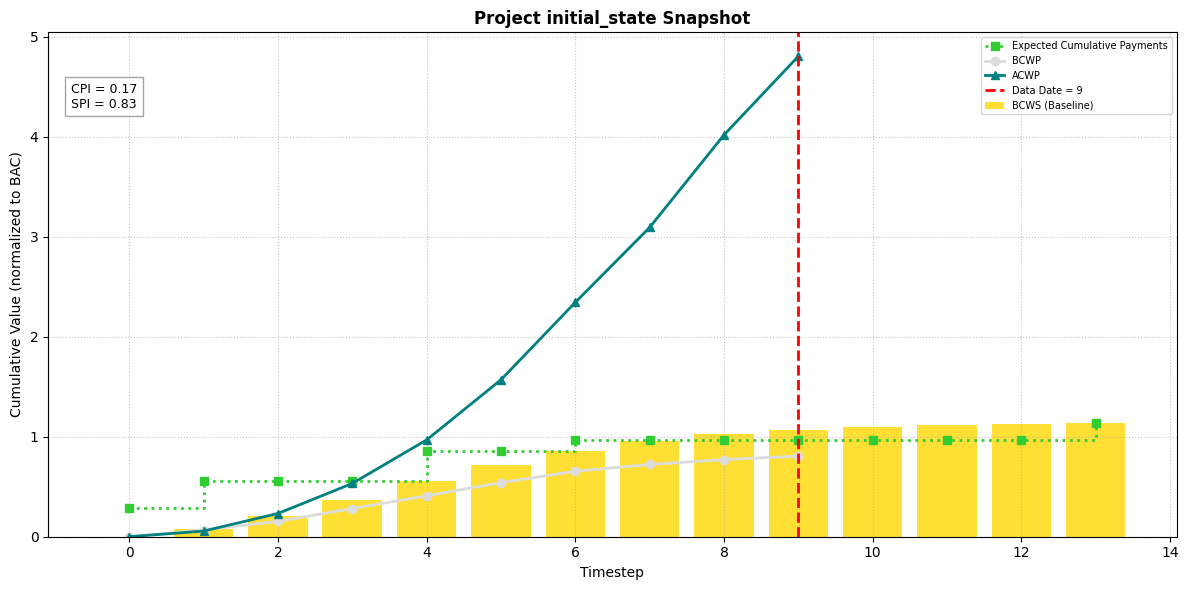

In [15]:
p = ProjectClass()

fig, ax = plt.subplots(figsize=(12, 6))
plot_project(ax, p)
plt.tight_layout()
plt.show()

# Portfolio Generator
each portfolio is instantiated by projects


In [ ]:
class PortfolioClass:
    def __init__(self, n_projects):
        self.n_projects = n_projects
        self.projects = []
        self.generate_portfolio()

    def generate_portfolio(self):

        for _ in range(self.n_projects):
            p = ProjectClass()
            self.projects.append(p)
    
    
#  ==== calling the poloting method for the projects in the portfolio ====
# fig, axes = plt.subplots(n_rows, 3)
# for ax, project in zip(axes.flatten(), portfolio.projects):
#     plot_project(ax, project)

## Plotting the portfolios

In [ ]:
def plot_portfolio(portfolio):
    n = portfolio.n_projects
    cols = 3
    rows = int(np.ceil(n / cols))

    fig, axes = plt.subplots(rows, cols, figsize=(16, rows * 4))
    axes = axes.flatten()  # flatten to a single list of axes

    for idx, project in enumerate(portfolio.projects):
        ax = axes[idx]
        plot_project(ax, project)
        ax.set_title(f"Project {idx+1}")

    # Hide unused axes (if any)
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


## Instantiating the test Portfolio


[INFO]: Initiating set_roi_rate
 

[SUCCESS]: generated and stored ROI_RATE
 0.05

[INFO]: Initiating set_duration
 

[SUCCESS]: generated random integer
 10

[SUCCESS]: generated and stored DURATION
 10

[INFO]: Initiating set_bac
 

[SUCCESS]: generated random uniform
 1.0879857634296022

[SUCCESS]: generated and stored BAC
 1.0879857634296022

[INFO]: Initiating set_s_curve
 

[SUCCESS]: DURATION acquired successfully
 10

[SUCCESS]: BAC acquired successfully
 1.0879857634296022

[INFO]: Initiating s_balanced
 

[SUCCESS]: generated s_balanced
 [0.    0.022 0.068 0.156 0.303 0.5   0.697 0.844 0.932 0.978 1.   ]

[SUCCESS]: generated and stored SCURVE_LIST
 [[ 0.     0.   ]
 [ 1.     0.024]
 [ 2.     0.074]
 [ 3.     0.169]
 [ 4.     0.33 ]
 [ 5.     0.544]
 [ 6.     0.758]
 [ 7.     0.919]
 [ 8.     1.014]
 [ 9.     1.064]
 [10.     1.088]]

[INFO]: Initiating set_s_curve_periodic
 

[SUCCESS]: SCURVE_LIST acquired successfully
 [[ 0.     0.   ]
 [ 1.     0.024]
 [ 2.     0.074]
 [

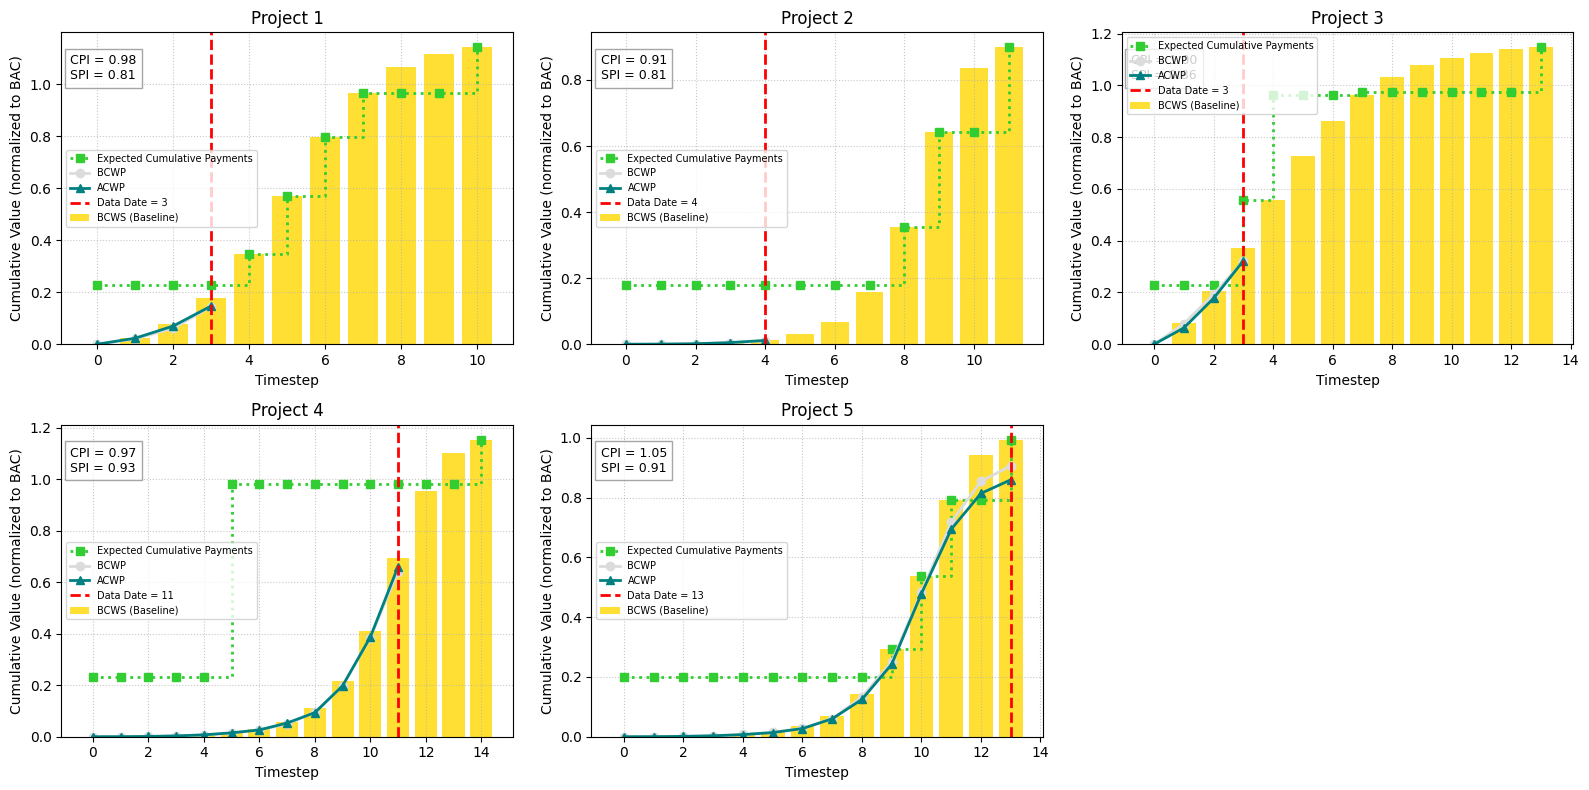

In [ ]:
# ! we will need to normalize the total BACs of the projects to TOTAL_BUDGET which is 1
n_projects = CONFIGURATIONS["n_projects"]

portfolio = PortfolioClass(n_projects)
plot_portfolio(portfolio)

## Devising the environement

### ENV class

In [ ]:
class ENV(Env):

    metadata = {"render_modes": ["human"]}

    def __init__(self, config=CONFIGURATIONS, scenario=ACTIVE_SCENARIO):
        super().__init__()

        self.config = config
        self.scenario = scenario

        # -------- ENV SIZE --------
        self.MAX_PROJECTS = config["MAX_PROJECTS"]
        self.MIN_PROJECTS = config["MIN_PROJECTS"]
        self.n_projects = config["n_projects"]
        self.total_timesteps = config["TOTAL_TIMESTEPS"]

        # -------- ACTION SPACE --------
        # Continuous allocation to each project
        self.action_space = Box(low=0.0, high=1.0, 
                                shape=(self.MAX_PROJECTS,),
                                dtype=np.float32)

        # -------- OBSERVATION SPACE --------
        # Example: [time, p1_progress, p1_remaining, p1_ROI, ..., pN_...]
        self.observation_dim = 1 + 5 * self.MAX_PROJECTS
        self.observation_space = Box(low=-np.inf, high=np.inf,
                                     shape=(self.observation_dim,),
                                     dtype=np.float32)

        # storage
        self.projects = []
        self.active_projects = []
        self.timestep = 0

    # ===========================================================
    def reset(self, seed=None, options=None):
        # library RNG reset
        super().reset(seed=seed)

        # generate fresh projects
        self.projects = self._generate_projects()
        self.active_projects = self.projects.copy()
        self.timestep = 0
        
        obs = self._get_observation()
        return obs, {}

    # ===========================================================
    def step(self, action):
        # normalize allocations (prevent PPO from sending garbage)
        if action.sum() <= 0:
            action = np.ones_like(action)
        action = action / (action.sum() + 1e-8)

        # apply allocation
        reward = self._apply_allocation(action)

        # advance time
        self.timestep += 1

        # remove completed projects
        self._retire_projects()

        # done if: time ended OR no project left
        done = self.timestep >= self.total_steps or len(self.active_projects) == 0

        obs = self._get_observation()
        info = {}

        return obs, reward, done, False, info

    # ===========================================================
    def render(self):
        print(f"\n--- Time: {self.timestep} ---")
        for p in self.active_projects:
            print(f"Project {p.id}: progress={p.progress:.2f} / {p.DURATION}")

    # ===========================================================
    # ---- internal helpers below ----
    
    def _generate_projects(self):
        """
        ← Here we will inject your whole project system:
        BAC, duration, s-curves, ROI, inflow composition, etc.
        """
        projects = []
        for i in range(self.MAX_PROJECTS):
            p = Project(i)     # you'll define Project class
            projects.append(p)
        return projects

    def _get_observation(self):
        """Pack all project features + timestep into a fixed vector."""
        obs = [self.timestep]

        for p in self.projects:
            if p in self.active_projects:
                obs += [
                    p.progress,
                    p.remaining_duration,
                    p.remaining_bac,
                    p.ROI_RATE,
                    p.periodic_cost
                ]
            else:
                # pad inactive ones with zeros
                obs += [0, 0, 0, 0, 0]

        return np.array(obs, dtype=np.float32)

    def _apply_allocation(self, action):
        """
        Distribute budget according to action vector.
        Use your SCURVE_LIST_PERIODIC for periodic cost handling.
        """
        reward = 0
        for i, p in enumerate(self.active_projects):
            alloc = action[i]
            reward += p.apply_allocation(alloc, self.timestep)
        return reward

    def _retire_projects(self):
        """Remove projects that reached completion."""
        still_active = []
        for p in self.active_projects:
            if p.progress >= 1.0:
                pass  # completed → retired
            else:
                still_active.append(p)
        self.active_projects = still_active


## The payment delay uncerainty
Payment delay uncertainty represents one of the most influential stochastic variables in project portfolio cash flow dynamics. Delays alter expected liquidity flows, distort working capital cycles, and influence the financial resilience of the entire portfolio.

Empirical research across construction, infrastructure, and multi-stakeholder IT projects confirms that payment behavior rarely follows deterministic schedules; instead, it follows distinct statistical and behavioral patterns — sometimes discrete, sometimes continuous, and often correlated with prior events.

To realistically capture such variability, we introduce five complementary stochastic modeling strategies for delay simulation:
* Geometric model – discrete, memoryless delay process (probabilistic per-period payment);
* Gaussian model – symmetric, continuous deviations (administrative uncertainty);
* Log-normal / Exponential model – long-tailed positive skew (severe payment lags);
* Markovian model – state-dependent persistence of delays (systemic behavior);
* Mixture model – hybrid ensemble of multiple distributions for diversified portfolios.
    | **Model**                          | **Mathematical Formulation**                                                 | **Empirical Basis / Justification**                                           | **Key Characteristics**                                                                        | **Use Case Examples**                                                            | 
    | ---------------------------------- | ---------------------------------------------------------------------------- | ----------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------- | -------------------------------------------------------------------------------- |
    | **Geometric Delay**                | $( P(D = k) = (1 - p)^{k-1} p )$                                               | Models recurring invoicing cycles with independent payment probability ( p ). | Discrete-time, memoryless, easily calibrated using frequency of “on-time vs delayed” payments. | Periodic contracts with monthly billing or milestone triggers.                   |        
    | **Gaussian (Normal) Delay**        | $( D \sim \mathcal{N}(\mu, \sigma^2)$ ), truncated $( D \ge 0 )$                 | Captures small symmetric administrative deviations around the expected date.  | Continuous, symmetric, fast convergence.                                                       | Government or institutional projects with stable payment systems.                |                                                    
    | **Log-Normal / Exponential Delay** | $( D \sim \text{LogNormal}(\mu, \sigma^2)$ ) or $( D \sim \text{Exp}(\lambda)$ ) | Models skewed, long-tail risk of significant payment delays.                  | Non-negative, skewed, accounts for extreme late payments.                                      | Construction, oil & gas, or infrastructure projects with complex payment chains. |                                                  
    | **Markovian Delay**                | $P_{ij}​=P(D_{t}​=s_{j} ​∣ D_{t−1} ​= s_{i}​) $                                                     | Captures correlated or state-dependent delay sequences (e.g., repeated client delays).         | Dynamic, stateful, captures systemic or contextual persistence.                  | Portfolios with recurring clients or interdependent contracts. |
    | **Mixture Model**                  | $ f(D)=\sum_{i=1}^K ​w_{i}​f_{i}​( D ∣ θ_{i}​) $                                                  | Aggregates heterogeneous project or client populations; fits multimodal delay patterns.        | Flexible, captures diversity across project types.                               | Cross-industry or multi-client project portfolios.             |


Each approach offers a tradeoff between analytical simplicity, empirical fidelity, and simulation tractability, making the combination a theoretically justified and empirically sufficient composition for generalizing delay uncertainty in project inflow modeling.


* Training and experiment scenarios for payment delayed modeling:

    | **Scenario**                    | **Purpose**                                                    | **Delay Model**         | **Expected Outcome / Observation**                                            |       
    | ------------------------------- | -------------------------------------------------------------- | ----------------------- | ----------------------------------------------------------------------------- |
    | **No Delay (Control)**          | Establish baseline performance with ideal cash flow.           | None                    | Benchmark: agent learns expected return patterns without uncertainty.         |         
    | **Small Random Delays**         | Simulate normal operational hiccups.                           | **Normal Distribution** | Tests robustness to mild timing noise; measures variance in returns.          |  
    | **Big Skewed Delays**           | Model long-tail risks and delayed client payments.             | **Log-Normal**          | Evaluates resilience under rare but severe delays; expected liquidity stress. | 
    | **Persistent Late Client**      | Represent behaviorally “sticky” clients with memory of delays. | **Markov Process**      | Tests policy adaptability under state-dependent delay persistence. |
    | **Hybrid Randomness (Mixture)** | Capture mixed populations of clients in real portfolios.       | **Mixture Model**       | Evaluates generalization: can agent handle varied and correlated patterns?    |     


## The payment amount uncertainty
“Payment amount uncertainty is modeled using a three-component generative process: small-magnitude multiplicative measurement noise (Gaussian/lognormal) to capture routine invoice/rounding variation; stochastic holdbacks modeled via Beta-distributed withholding fractions to capture client-side disputes and ad-hoc retention; and rare heavy-tail reductions (with low probability) to represent disputes, defaults or clawbacks. The composite model mirrors empirically observed payment behavior in contracting literature and provides both dense and rare-event variability required to test policy robustness.”

The three payment-amount uncertainty strategies:
1. Multiplicative measurement noise (continuous, small perturbations)
2. Withholding / partial payment (retention & dispute) (discrete fraction withheld)
3. Stochastic partial/default events (rare, heavy-tailed reductions)
    | Strategy                                              |                                                                                                                                 Intuition / Real-world Mechanism | When it applies                                      | Effect on agent learning / decisions                                                                                      |
    | ----------------------------------------------------- | :--------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------- |
    | **Multiplicative measurement noise**                  |                                   Small, frequent deviations in paid amounts due to rounding, accounting, petty deductions, or exchange-rate micro-fluctuations. | Every payment event (milestone, EV-pay, lump).       | Adds dense, low-amplitude stochasticity → encourages robustness to forecast noise; little structural change in liquidity. |
    | **Withholding / partial holdback**                    | Client withholds a (small) fraction pending QA, dispute resolution, or ad-hoc rejection of a claim. Differs from planned retention because it is semi-unplanned. | Milestone and EV-based payments; sometimes advances. | Systematic downscaling of expected inflows → forces the agent to maintain buffers and plan conservatively.                |
    | **Rare heavy reductions (shock / dispute / default)** |                                                      Infrequent but large payment reductions or reversals due to disputes, defaults, or contract renegotiations. | Any payment event; usually rare and high-impact.     | Tail-risk events that require robustness; policies must avoid catastrophic liquidity exposures or rely on borrowing.      |


Combining the strategies:
* You can mix them multiplicatively and sequentially
1. Generate scheduled raw payment 𝑃 (Dirichlet fractions, EV mapping, or lump value).
2. Apply multiplicative measurement noise: 𝑃 ← 𝑃 ⋅ ( 1 + 𝜀 ).
3. Apply scheduled retention (if any) and randomly sampled unplanned holdback: P←(1−r−h)P.
4. With rare probability $P_{s}$ apply shock reduction:  P←(1−d)P.
5. Clip to $[0,P_{max}]$ and shift by delay.



How to integrate into training & experiments:
1. Train with moderate noise + occasional holdbacks (σ=0.02, p_s=0.01).
2. Robustness tests: stress with higher σ, higher p_s, or correlated shocks across projects.
3. Ablation: train without shocks vs train with shocks; show agent robustness gap.
4. Observability variants: expose expected holdback probability or keep it latent (partial observability) and measure agent adaptability.

    | Experiment ID | σ (noise) | p_s (shock) | r (retention) | Description                         |
    | ------------: | --------: | ----------: | ------------: | ----------------------------------- |
    |          Base |      0.02 |        0.01 |          0.05 | Default training regime             |
    |      No-noise |      0.00 |        0.01 |          0.05 | Ablation: remove measurement noise  |
    |    High-shock |      0.02 |        0.05 |          0.05 | Stress test with frequent shocks    |
    |   No-holdback |      0.02 |        0.01 |          0.00 | Test effect of unplanned holdbacks  |
    |  Stressed-mix |      0.04 |        0.03 |          0.10 | Harsh regime for resilience testing |


## Shared uncertainties and project correlations

Milestone-based payment models in this study explicitly include the common hybrid ‘advance + milestone + retention’ structure. We model the advance as the first milestone (t=0) with advance fraction α_adv (default 15%). Subsequent milestone fractions are sampled from a Dirichlet distribution and scaled to satisfy Σ payments + retention = BAC. Payments are subject to geometric delays and multiplicative noise. This parametric approach allows the environment to represent advance-funded, milestone-funded, and hybrid contracts with a single, transparent generator; sensitivity analyses over α_adv and retention r are presented to demonstrate robustness.


Primary experiments assume independent payment timing and amount uncertainty across projects to focus on budget allocation behavior. To test robustness, we include a single correlated stress scenario: with probability $p_{global}$ (0.01 per episode) a global shock simultaneously increases expected payment delays and reduces received payment amounts for all projects for $s$ timesteps. 

We intentionally prioritize clarity and the core budgeting problem. Full correlation modeling is orthogonal to the main contribution and would significantly enlarge the scope. We validate the agent’s robustness using a minimal, interpretable correlated scenario (global shock or single latent factor) and leave a systematic study of copula-based and multi-factor dependencies for future work.

This models systemic liquidity disruptions (e.g., macro slowdown) and demonstrates policy resilience under correlated risk. Sensitivity to shock probability and severity is reported in Section X111

To probe the agent’s robustness to correlated cashflow risk we implement a simple latent-factor model and a synchronous shock layer. The latent-factor Z_t perturbs per-project payment parameters (amount/delay) with small loadings; this introduces controllable pairwise correlation without over-parameterizing the environment. Additionally, infrequent global shocks (probability $𝑝_{global​}$) synchronously increase delays and reduce payment amounts to simulate systemic stress. We vary factor strength and shock probability in sensitivity tests.

Latent-Factor Correlation:

* Introduce a shared underlying factor 𝐹 that affects all projects proportionally.
* Simulates common macroeconomic or market trends.
* Formula for project variable $𝑋_{𝑖}​$:
    * $ X_{i}\ =\ \mu_{i}\ +\ \beta_{i}\ F\ +\ \epsilon_{i} $
    * $\mu_{i}$: mean value
    * $\beta_{i}$: sensitivity to latent factor
    * $\epsilon_{i}$: independent project noise
* Purpose: agent learns to adapt to portfolio-level systemic trends, not just isolated randomness.

Global Shock:
* Rare, extreme event affecting all projects simultaneously.
* Formula addition:
    * $ X_{i}\ =\ \mu_{i}\ +\ \beta_{i}\ F\ +\ \gamma_{i}S\ +\ \epsilon_{i} $
    * 𝑆: global shock variable (probabilistic occurrence)
    * $\gamma_{i}S$: sensitivity of each project to the shock
* Examples: financial crisis, widespread client defaults, regulatory change.
* Purpose: stress-test agent and evaluate robustness under extreme scenarios.

## Delay–amount correlation within a single project